In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

# The Laplace approximation

The Laplace approximation is a method to approximate a probability distribution with a Gaussian distribution. The method is based on the Taylor expansion of the logarithm of the probability distribution around the mode of the distribution. The Laplace approximation is a useful tool in Bayesian statistics, where it is used to approximate the posterior distribution of a parameter given some data.

## The Taylor Expansion in Higher Dimensions
Let $g:\mathbb{R}^d\rightarrow \mathbb{R}$ and $x_0\in\mathbb{R}^d$.
The Taylor series expansion is:

$$
g(x) = g(x_0) + \sum_{i=1}^d\frac{\partial g(x_0)}{\partial x_i}(x_i-x_{0i})+\frac{1}{2}\sum_{i,j=1}^d\frac{\partial^2g(x_0)}{\partial x_i\partial x_j}(x_i-x_{0i})(x-x_{0j}) + \dots
$$

Another way of writing this is:

$$
g(x) = g(x_0) + \nabla g(x_0)^T(x-x_0) + \frac{1}{2}(x-x_0)^T\nabla^2 g(x_0) (x-x_0),
$$

where the *Jacobian* is defined as:

$$
\nabla g(x_0) = \left(\frac{\partial g(x_0)}{\partial x_1},\dots,\frac{\partial g(x_0)}{\partial x_1}\right),
$$

and the *Hessian* is:

$$
\nabla^2 g(x_0) = \left(\frac{\partial^2g(x_0)}{\partial x_i\partial x_j}\right)_{i,j=1}^d.
$$

## The Laplace Approximation in 1D
If you are not interested in probabilities of rare events, you may approximate any probability density as a Gaussian (assuming that it is sufficiently narrow).
Let $X$ be a random variable with probability density $p(x)$.
Because $p(x)$ is positive, it is better to work with its logarithm.
First, we find the maximum of $\log p(x)$ which is called the *nominal value* (or just maximum):

$$
x_0 = \arg\max_x \log p(x).
$$

Then, we take the Taylor expansion of $\log p(x)$ about $x=x_0$:

$$
\log p(x) = \log p(x_0) + \frac{d\log p(x_0)}{dx} (x-x_0) + \frac{1}{2}\frac{d^2\log p(x_0)}{dx^2} (x-x_0)^2 + \dots.
$$

Since $x_0$ is a critical point of $\log p(x)$, we must have that:

$$
\frac{d\log p(x_0)}{dx} = 0.
$$

So, the expansion becomes:

$$
\log p(x) = \frac{1}{2}\frac{d^2\log p(x_0)}{dx^2} (x-x_0)^2 + \text{const}.
$$

Therefore,

$$
p(x) \propto \exp\left\{ \frac{1}{2}\frac{d^2\log p(x_0)}{dx^2} (x-x_0)^2 \right\}.
$$

Since $x_0$ is a maximum of $\log p(x)$, the matrix $\frac{d^2\log p(x_0)}{dx^2}$ must be a negative number.
Therefore, the number:

$$
c^2 = -\left[\frac{d^2\log p(x_0)}{dx^2}\right]^{-1},
$$

is positive.
By inspection then, we see that:

$$
p(x) \propto \exp\left\{-\frac{(x-x_0)^2}{2c^2}\right\}.
$$

Ignoring all higher order terms, we conclude:

$$
p(x) \approx \mathcal{N}\left(x|x_0, -\left[\frac{d^2\log p(x_0)}{dx^2}\right]^{-1}\right).
$$

This is the Laplace approximation in one dimension.


grad minus log p at x0 is:  -0.1250008594411156


/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_38266/1013792821.py:19: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  grad_m_log_p_0 = scipy.misc.derivative(minus_log_pdf_true, x_0, dx=1e-6, n=1)
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_38266/1013792821.py:23: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  grad_2_m_log_p_0 = scipy.misc.derivative(minus_log_pdf_true, x_0, dx=1e-6, n=2)


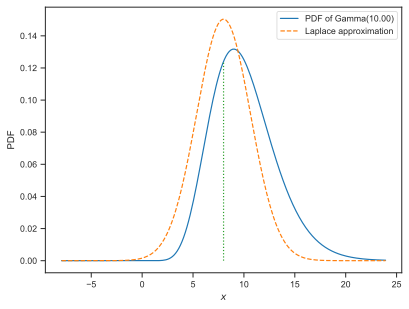

In [8]:
# TODO: Convert to jax, fix plot style

import numpy as np
import scipy
import scipy.stats as st

# Construct the ``true random variable``
alpha = 10
X = st.gamma(a=alpha)
# Find the maximum using an optimization method (the minus is because we will use a minimization method)
minus_log_pdf_true = lambda x: -np.log(X.pdf(x))
res = scipy.optimize.minimize_scalar(minus_log_pdf_true, bounds=[1., 8])
# This is the maximum of the pdf
x_0 = res.x
# This is the value of the pdf at the maximum:
p_0 = np.exp(-res.fun)
# The derivative of the pdf at the maximum should be exaclty zero.
# Let's verify it using numerical integration
grad_m_log_p_0 = scipy.misc.derivative(minus_log_pdf_true, x_0, dx=1e-6, n=1)
print('grad minus log p at x0 is: ', grad_m_log_p_0)
# We need the second derivative.
# We will get it using numerical integration as well:
grad_2_m_log_p_0 = scipy.misc.derivative(minus_log_pdf_true, x_0, dx=1e-6, n=2)
# The standard deviation of the Gaussian approximation to p(x) is:
c = np.sqrt(1. / grad_2_m_log_p_0)
# Using scipy code, the random variable that approximates X is:
Z = st.norm(loc=x_0, scale=c)
# Let's plot everything
fig, ax = plt.subplots()
x = np.linspace(x_0 - 6 * c, x_0 + 6 * c, 200)
pdf_true = X.pdf(x)
# Plot the truth:
ax.plot(x, pdf_true)
# Mark the location of the maximum:
# Plot the approximation
ax.plot(x, Z.pdf(x), '--')
ax.plot([x_0] * 10, np.linspace(0, p_0, 10), ':')
plt.legend(['PDF of Gamma(%.2f)' % alpha, 'Laplace approximation'], loc='best')
ax.set_xlabel('$x$')
ax.set_ylabel('PDF');

## The Laplace Approximation in Many Dimensions
Then, we take the Taylor expansion of $\log p(x)$ about $x=x_0$:

$$
\log p(x) = \log p(x_0) + \nabla \log p(x_0) (x-x_0) + \frac{1}{2}(x-x_0)^T\nabla^2 \log p(x_0) (x-x_0) + \dots.
$$

Since $x_0$ is a critical point of $\log p(x)$, we must have that:

$$
\nabla \log p(x_0) = 0.
$$

So, the expansion becomes:

$$
\log p(x) = \frac{1}{2}(x-x_0)^T\nabla^2 \log p(x_0) (x-x_0) + \text{const}.
$$

Therefore,

$$
p(x) \propto \exp\left\{ \frac{1}{2}(x-x_0)^T\nabla^2 \log p(x_0) (x-x_0) \right\}.
$$

Since $x_0$ is a maximum of $\log p(x)$, the matrix $\nabla^2 \log p(x_0)$ must be negative definite.
Therefore, the matrix:

$$
C = -(\nabla^2\log p(x_0))^{-1},
$$

is positive definite.
By inspection then, we see that:

$$
p(x) \propto \exp\left\{-\frac{1}{2}(x-x_0)^TC^{-1}(x-x_0)\right\}.
$$

Ignoring all higher order terms, we conclude:

$$
p(x) \approx \mathcal{N}\left(x|x_0, -(\nabla^2\log p(x_0))^{-1}\right).
$$

This is the Laplace approximation in many dimensions.

## The Laplace Approximation

If you have a linear model and a Gaussian likelihood and the prior $p(x)$ is Gaussian, then this is just a Gaussian.
In general, you can only chacterize it through sampling or some approximation.
We will discuss sampling from the posterior in Lecture 21 when we will introduce Markov Chain Monte Carlo.
For now, let us discuss the Laplace approximation to the posterior.

The Laplace approximation finds a Gaussian approximation to the posterior.
For simplicity we will work with a Gaussian likelihood, but these ideas can be applied to any likelihood.
To avoid over complicating things on this first attempt, let us assume that we know the value of $\sigma$.
We will generalize our approach later.
Our posterior is (for just $x$) is:

$$
p(x|y,\sigma) \propto p(y|x,\sigma)p(x) = \mathcal{N}\left(y|f(x),\sigma^2\right)p(x) \propto \exp\left\{-\frac{\parallel y - f(x) \parallel_2^2}{2\sigma^2}\right\}p(x).
$$

To implement the Laplace approximation define:

$$
L(x) = -\frac{\parallel y - f(x) \parallel_2^2}{2\sigma^2} + \log p(x).
$$

We need to find the maximum of this:

$$
\mu = \arg\max_{x\in\mathcal{X}} L(x),
$$

the matrix

$$
\Sigma = -\left(\nabla^2 L(\mu)\right)^{-1},
$$

and the approximation is:

$$
p(x|y,\sigma) \approx \mathcal{N}(x|\mu,\Sigma).
$$

The second derivative is:

$$
\frac{\partial ^2 L(\mu)}{\partial x_j \partial x_r} = \frac{1}{\sigma^2}\sum_{i=1}^m\frac{\partial f_i(\mu)}{\partial x_j}\frac{\partial f_i(\mu)}{\partial x_r}-\frac{1}{\sigma^2}\sum_{i=1}^m(y_i-f_i(\mu))\frac{\partial^2 f_i(\mu)}{\partial x_j\partial x_r} + \frac{\partial^2\log p(\mu)}{\partial x_r\partial x_j}.
$$

So, you need the second derivatives of your model...